In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [8]:
# Click the rate (CTR) for the control group

control_df = df.query('group == "control"')

# CTR - the number of unique users who click atleast once divided by the number of unique visitors who view the page.

In [9]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

In [10]:
control_ctr

0.2797118847539016

In [11]:
# Click the rate (CTR) for the experiment group
experiment_df = df.query('group == "experiment"')

In [13]:
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
experiment_ctr

0.3097463284379172

In [15]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [17]:
df.shape

(8188, 4)

In [28]:
diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace = True)
    control_df = sample.query('group == "control"')
    experiment_df = sample.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

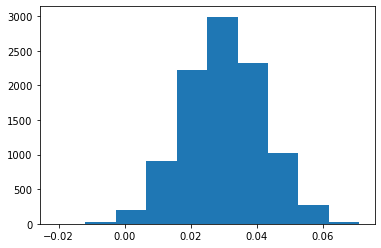

In [29]:
plt.hist(diffs);

In [30]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), 10000)

In [31]:
diffs.std(), diffs.size

(0.01187891930962979, 10000)

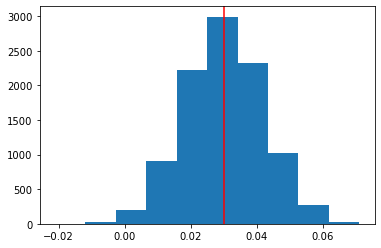

In [32]:
plt.hist(diffs);
plt.axvline(x=obs_diff, color='red')